In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Feedback en tus modelos

In [3]:
X = pd.read_csv('..\..\..\DataSets\Resultados intermedios peliculas DS\X.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis=1)
X = X.drop('gross', axis=1)

In [4]:
from sklearn.linear_model import Lasso

model = Lasso()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)#Hace 0.75 por default

In [7]:
len(X_train)/len(X)

0.75

In [8]:
model.fit(X_train, y_train)

C:\Users\WINDOWS TEN PRO\Anaconda3\envs\Platzi - FundamentosAL\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.447527134540718e+18, tolerance: 9155913992168990.0
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [9]:
model.score(X_test, y_test)

0.5995525421956397

In [10]:
model.coef_

array([ 3.03036411e+00, -1.00756438e+05, -4.81902985e+06,  8.12879702e+04,
       -1.05923542e-02,  2.61870670e+07])

In [11]:
var = np.floor(np.log10(np.abs(model.coef_)))#Para visualizar mejor los datos

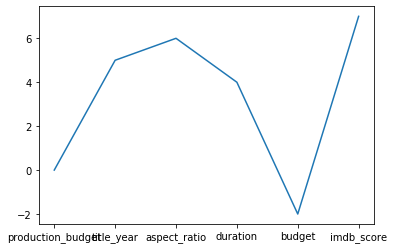

In [12]:
plt.plot(var)
plt.xticks(np.arange(6),list(X.columns));

## Correlación entre variable

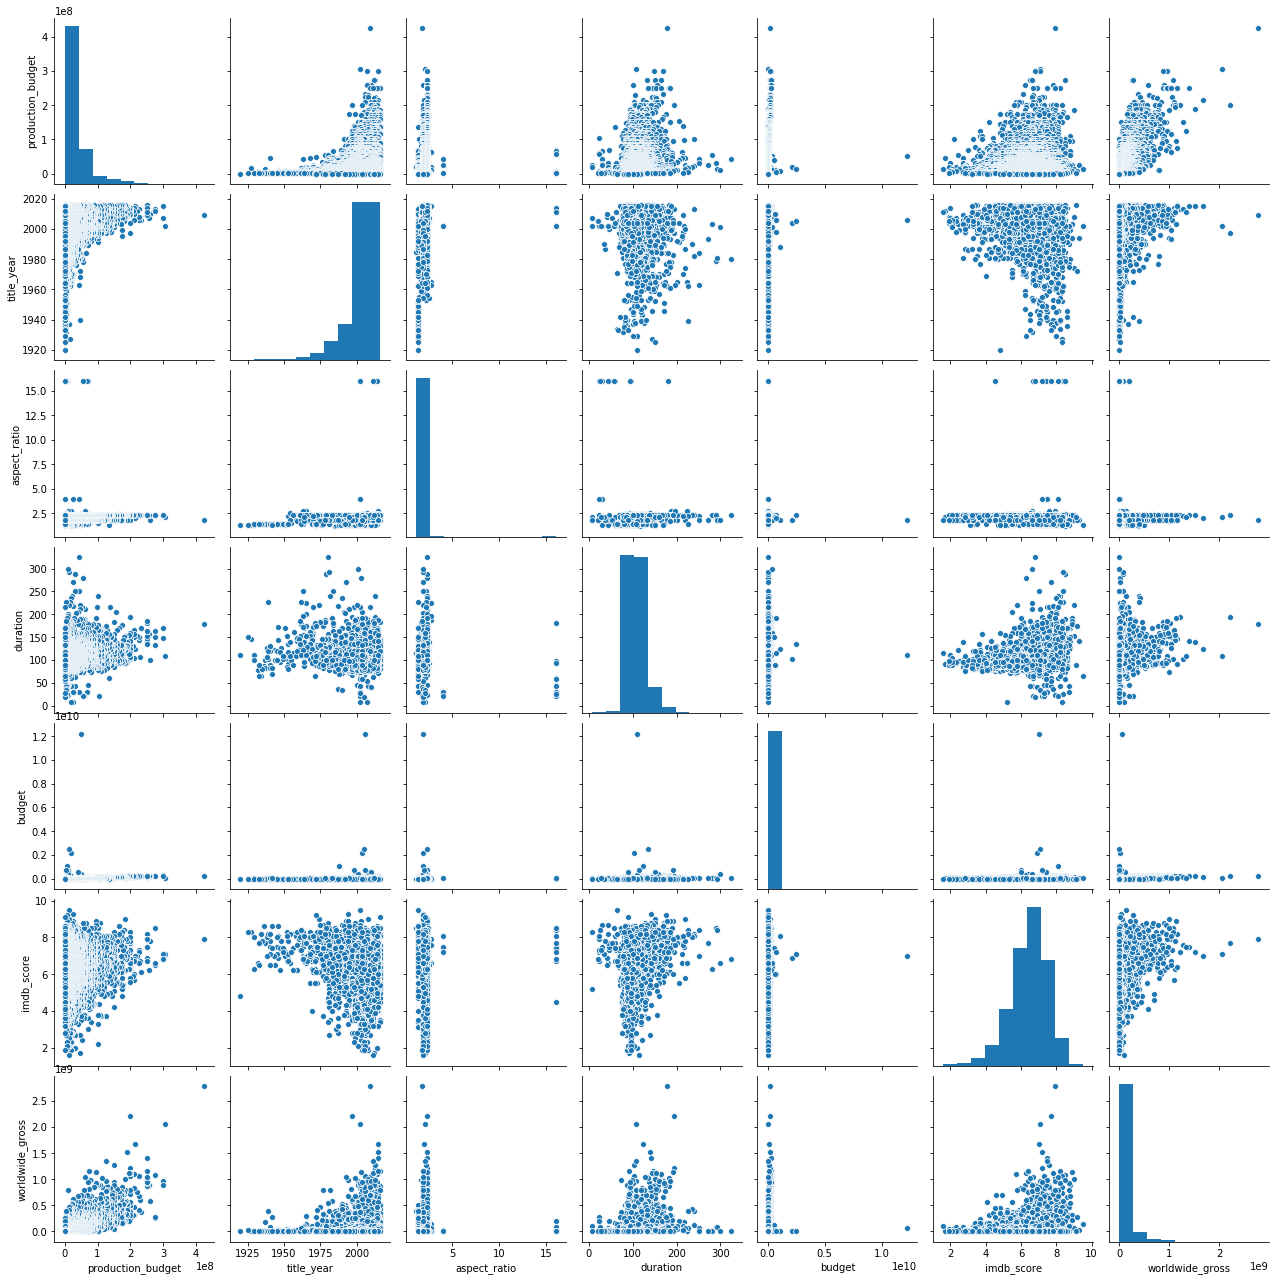

In [13]:
import seaborn as sns
z = pd.concat([X,y], axis=1)
sns.pairplot(z)

In [14]:
z.head(2)

,production_budget,title_year,aspect_ratio,duration,budget,imdb_score,worldwide_gross
0,425000000.0,2009.000000,1.780000,178.000000,2.370000e+08,7.9,2.783919e+09
1,306000000.0,2002.130733,2.126976,108.577186,4.045539e+07,7.1,2.058662e+09


In [15]:
clase = pd.cut(z['production_budget'],8).cat.codes.rename('class')

Lo usamos para crear niveles a la variable objetivo, en este caso hay 8 niveles y entre mas production_budget tenga, mayor nivel tendrá, esto lo usaremos para que sean más fáciles de leer los datos a la hora de graficar con pairplot

In [19]:
z2 = pd.concat([z, clase], axis=1)

C:\Users\WINDOWS TEN PRO\Anaconda3\envs\Platzi - FundamentosAL\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\WINDOWS TEN PRO\Anaconda3\envs\Platzi - FundamentosAL\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\WINDOWS TEN PRO\Anaconda3\envs\Platzi - FundamentosAL\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\WINDOWS TEN PRO\Anaconda3\envs\Platzi - FundamentosAL\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\WINDOWS TEN PRO\Anaconda3\envs\Platzi - FundamentosAL\lib\site-packages\seaborn\distributions.py:288: UserWarni

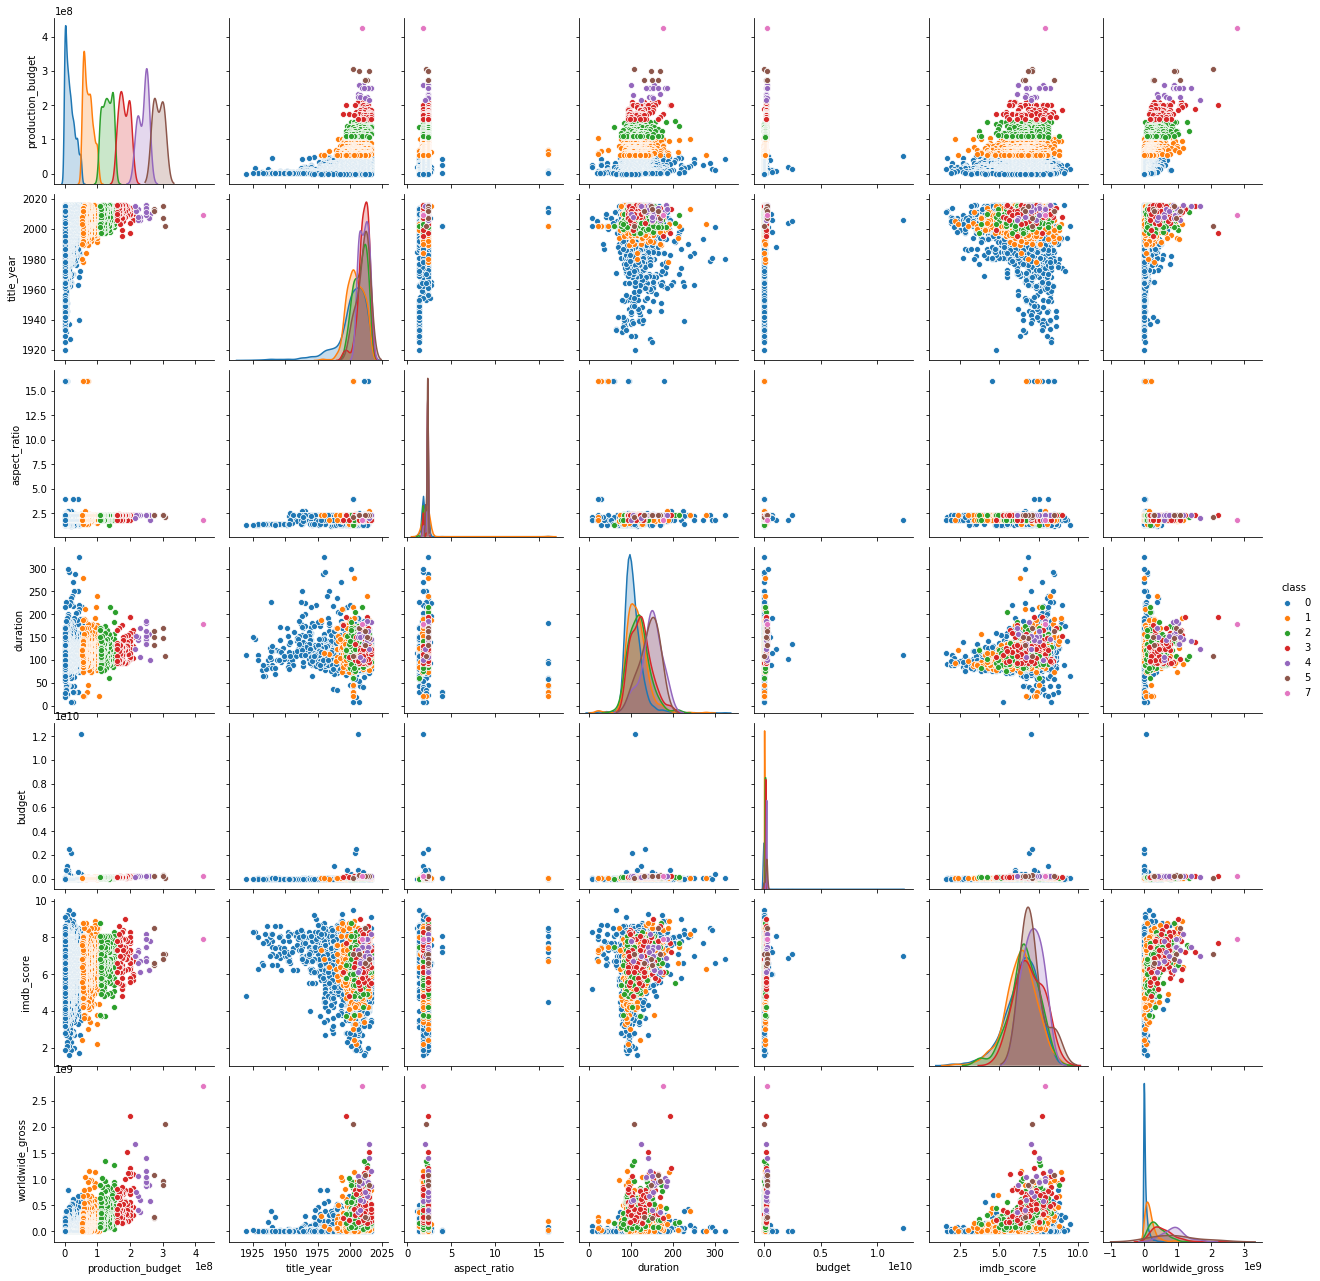

In [20]:
sns.pairplot(z2, hue='class')

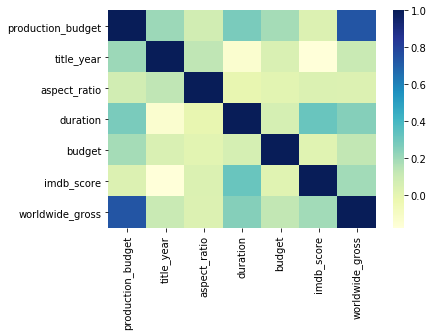

In [23]:
z3 = pd.concat([X,y],axis=1)
sns.heatmap(z3.corr(), cmap="YlGnBu")

## Metodos de selección automática de features

In [26]:
from sklearn.feature_selection import SelectKBest

In [27]:
from sklearn.feature_selection import mutual_info_regression#Métrica

selector = SelectKBest(mutual_info_regression, k = 4)
selector.fit(X,y)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x000001E04B1B60D8>)

In [28]:
scores = selector.scores_

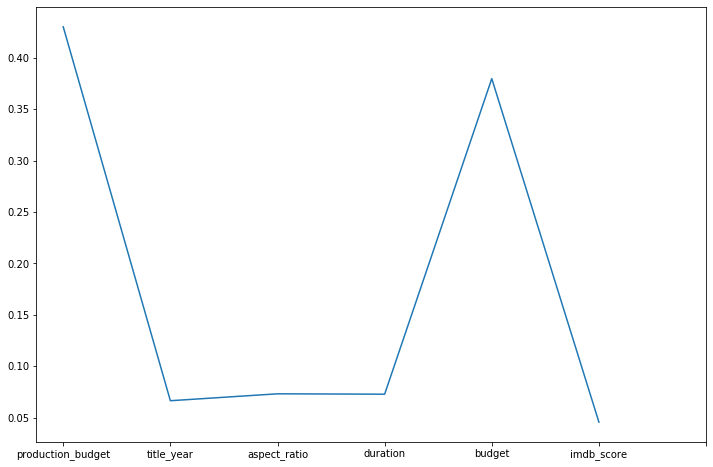

In [30]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(7),list(X.columns));

In [34]:
X2 = X[['production_budget','title_year', 'duration', 'imdb_score']]
X3 = X[['production_budget', 'duration', 'imdb_score']]

,production_budget,title_year,aspect_ratio,duration,budget,imdb_score
0,425000000.0,2009.000000,1.780000,178.000000,2.370000e+08,7.9
1,306000000.0,2002.130733,2.126976,108.577186,4.045539e+07,7.1


## Resultados del modelo con nuevas features

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [36]:

cols2 = ['production_budget','title_year', 'duration', 'imdb_score']
X2_train, X2_test, y2_train, y2_test = X_train[cols2], X_test[cols2], y_train, y_test

cols3 = ['production_budget', 'duration', 'imdb_score']
X3_train, X3_test, y3_train, y3_test = X_train[cols3], X_test[cols3], y_train, y_test

In [40]:
model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train, y_train)
model2.fit(X2_train, y_train)
model3.fit(X3_train, y_train)

C:\Users\WINDOWS TEN PRO\Anaconda3\envs\Platzi - FundamentosAL\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.110144361963514e+18, tolerance: 9980702090454554.0
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
print(model1.score(X_test, y_test))
print(model2.score(X2_test, y2_test))
print(model3.score(X3_test, y3_test))

0.4985723005067276
0.4967137574357193
0.49686362062346323


Se puede ver que bajar la dimension al dataset no ayudó particularmente al modelo, esto se debe a que originalmente no habían tantas features, por lo que realmente no se tenia una maldicion de la dimension